# Before Convolutional Neural Network

## Real Game : CIFAR-10

여기에서는 여러분이 직접 코드를 완성해야 하는 문제가 곳곳에 있습니다!

In [26]:
'''
matplolib inline 명령어를 통해서
matplot으로 그리는 플롯들을 주피터 노트북 내에서 볼 수 있게 해준다.
포맷을 retina로 바꾸면 그래프의 화질이 훨씬 좋아진다.
'''
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

import random as rd

from sklearn.metrics import accuracy_score

### 데이터를 불러옵시다.

In [27]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar10.load_data()

In [28]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [29]:
labels = { 0 : 'Airplane',
          1 : 'Automobile',
          2 : 'Bird',
          3 : 'Cat',
          4 : 'Deer',
          5 : 'Dog',
          6 : 'Frog',
          7 : 'Horse',
          8 : 'Ship',
          9 : 'Truck' }

print(labels)

{0: 'Airplane', 1: 'Automobile', 2: 'Bird', 3: 'Cat', 4: 'Deer', 5: 'Dog', 6: 'Frog', 7: 'Horse', 8: 'Ship', 9: 'Truck'}


id = 980
다음 그림은 Bird 입니다.


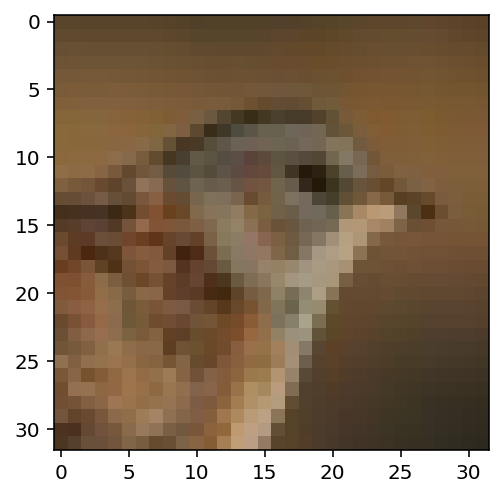

In [30]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print('id = {}'.format(id))
print('다음 그림은 {} 입니다.'.format( labels[test_y[id][0]] ))
plt.imshow(test_x[id])
plt.show()

In [31]:
print('max :', train_x.max(),'  min :', train_x.min())

max : 255   min : 0


### 코드를 완성해주세요!

해야 할 일

1. 전처리
    * x, y에 대하여 모두! 단, x에 대하여 reshape를 의도한 것은 아닙니다!

2. 모델링
    * 이미지 데이터를 펼쳐주는 레이어를 사용하세요.
    * 히든 레이어 4개 사용, 각 노드는 512, 512, 256, 128
    * 이 문제는 회귀? 분류?

3. 학습
    * epochs=50, validation_split=0.2, early stopping
    * epoch별 accuracy, loss가 보고 싶다면 history라는 변수에 담아내자!

In [32]:
#############
# Your Code #
#############
max = train_x.max()

train_x = train_x/max
test_x = test_x/max

train_x.max(), train_x.min()

(1.0, 0.0)

In [33]:
np.unique(train_y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [34]:
#############
# Your Code #
#############
#y_len = len(set(train_y.reshape(-1)))
y_len = len(np.unique(train_y))

In [35]:
train_y = to_categorical(train_y, y_len)
test_y = to_categorical(test_y, y_len)

In [36]:
train_x.shape, train_y.shape

((50000, 32, 32, 3), (50000, 10))

In [37]:
# 참고
from sklearn.preprocessing import MinMaxScaler

train_x.shape, np.ndim(train_x)
mm = MinMaxScaler()
train_x_mm = mm.fit_transform(train_x.reshape(train_x.shape[0], -1))

np.ndim(train_x_mm), train_x_mm.shape

(2, (50000, 3072))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,001,546
Trainable params: 2,001,546
Non-

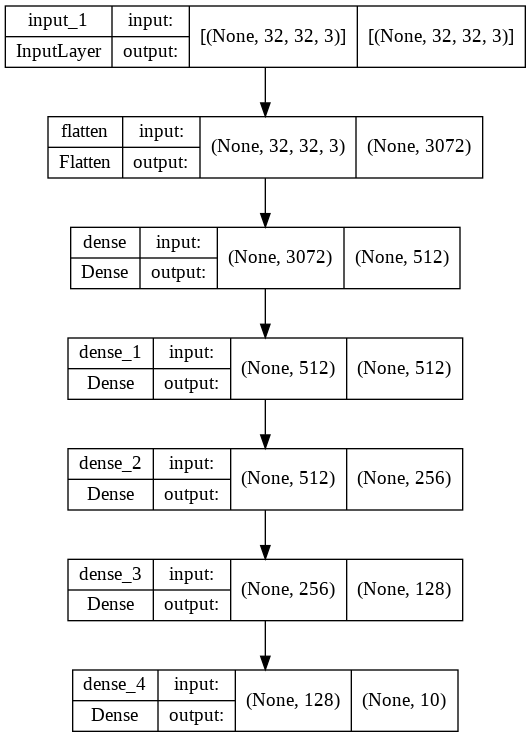

In [38]:
#############
# Your Code # Sequential
#############
keras.backend.clear_session()

model = keras.models.Sequential()

model.add(keras.layers.Input(shape=(train_x[0].shape))) #train_x[1]도 같은 값
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

model.summary()
tf.keras.utils.plot_model(model, show_shapes=True)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 10)                1290  

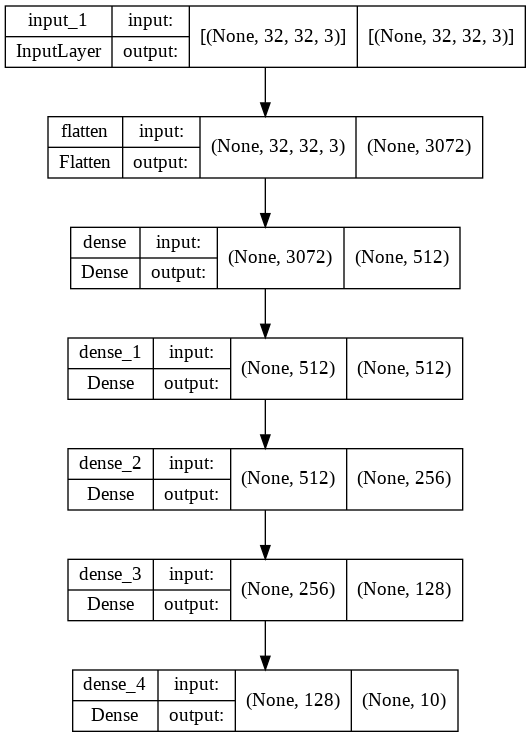

In [39]:
#############
# Your Code # Functional
#############
keras.backend.clear_session()

a = keras.layers.Input(shape=(32, 32, 3))
fl = keras.layers.Flatten()(a)
h = keras.layers.Dense(512, activation='relu')(fl)
h = keras.layers.Dense(512, activation='relu')(h)
h = keras.layers.Dense(256, activation='relu')(h)
h = keras.layers.Dense(128, activation='relu')(h)
b = keras.layers.Dense(10, activation='softmax')(h)

model = keras.models.Model(a,b)

model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

model.summary()
tf.keras.utils.plot_model(model, show_shapes=True)

In [40]:
#############
# Your Code #
#############
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, restore_best_weights=True)

In [41]:
#############
# Your Code #
#############
history = model.fit(train_x, train_y, epochs=50, verbose=1, batch_size=128, validation_split=0.2, callbacks=[es])

Epoch 1/50
313/313 [==============================] - 5s 9ms/step - loss: 1.9039 - accuracy: 0.3067 - val_loss: 1.7580 - val_accuracy: 0.3662
Epoch 2/50
313/313 [==============================] - 2s 8ms/step - loss: 1.6984 - accuracy: 0.3873 - val_loss: 1.6910 - val_accuracy: 0.3868
Epoch 3/50
313/313 [==============================] - 2s 8ms/step - loss: 1.6313 - accuracy: 0.4139 - val_loss: 1.6556 - val_accuracy: 0.4061
Epoch 4/50
313/313 [==============================] - 2s 8ms/step - loss: 1.5550 - accuracy: 0.4403 - val_loss: 1.5738 - val_accuracy: 0.4435
Epoch 5/50
313/313 [==============================] - 2s 8ms/step - loss: 1.5122 - accuracy: 0.4593 - val_loss: 1.5570 - val_accuracy: 0.4463
Epoch 6/50
313/313 [==============================] - 2s 8ms/step - loss: 1.4756 - accuracy: 0.4694 - val_loss: 1.5202 - val_accuracy: 0.4664
Epoch 7/50
313/313 [==============================] - 2s 8ms/step - loss: 1.4339 - accuracy: 0.4846 - val_loss: 1.5118 - val_accuracy: 0.4680
Epoch 



---



In [42]:
performance_test = model.evaluate(test_x, test_y)

print('Test Loss : {:.6f},  Test Accuracy : {:.3f}%'.format(performance_test[0], performance_test[1]*100))

313/313 [==============================] - 1s 4ms/step - loss: 1.4141 - accuracy: 0.4949
Test Loss : 1.414139,  Test Accuracy : 49.490%


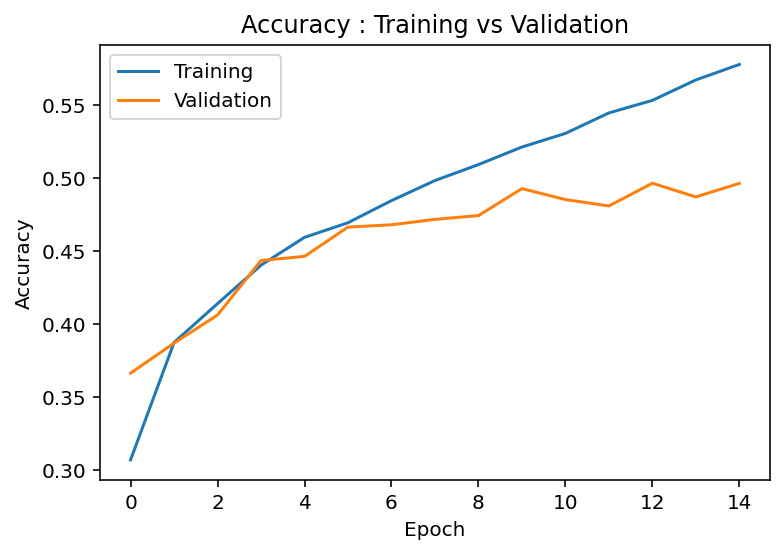

In [43]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

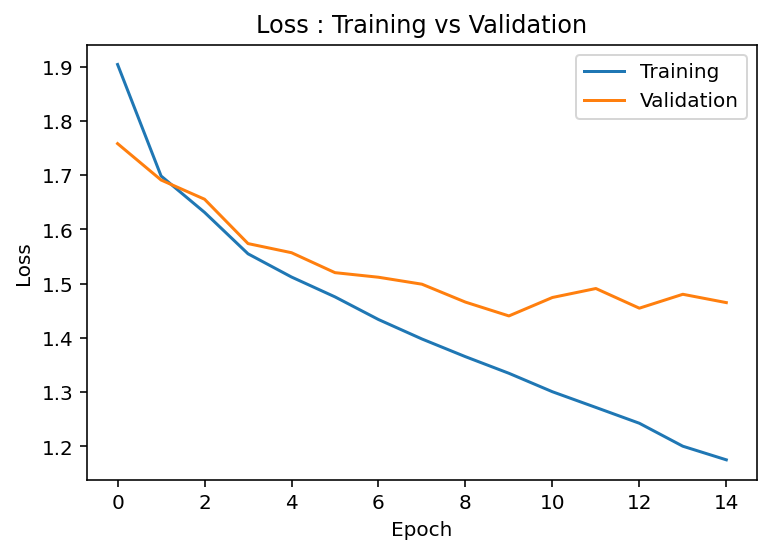

In [44]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [45]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)


print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

트레이닝 정확도 : 53.66%
테스트 정확도 : 49.49%


id = 2682
다음 그림은 Horse 입니다.
모델의 예측 : Deer
모델의 카테고리별 확률 : 
{'Airplane': 0.0, 'Automobile': 0.0, 'Bird': 11.0, 'Cat': 12.0, 'Deer': 36.0, 'Dog': 7.0, 'Frog': 9.0, 'Horse': 21.0, 'Ship': 0.0, 'Truck': 0.0}
틀렸어요


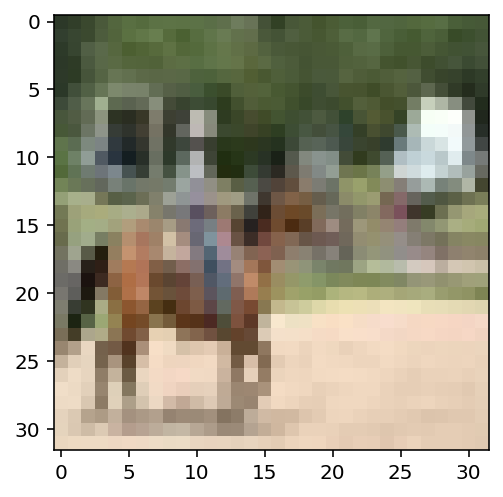

In [47]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print('id = {}'.format(id))
print('다음 그림은 {} 입니다.'.format(labels[test_y.argmax(axis=1)[id]] ))
print('모델의 예측 : {}'.format(labels[single_pred_test[id]] ))

prob = np.floor(pred_test[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
    
plt.imshow(test_x[id].reshape([32,32,-1]))
plt.show()